# Examples for Day 1

In [1]:
# initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# %load ml01.py
from sklearn.datasets import make_classification
# Create a synthetic dataset for classification
X, y = make_classification(n_samples=100, n_features=20, 
                           n_informative=2, n_redundant=2, 
                           n_classes=2, random_state=42)
# X contains the feature matrix
# y contains the target labels

In [3]:
X.shape, y.shape

((100, 20), (100,))

In [4]:
# %load ml02.py
from sklearn.datasets import make_blobs
# Create a synthetic dataset using make_blobs
X, y = make_blobs(n_samples=100, centers=3, 
                  n_features=2, random_state=42)
# X contains the feature matrix
# y contains the cluster labels


In [5]:
X.shape, y.shape

((100, 2), (100,))

In [6]:
# %load ml03.py
# Import the necessary module from scikit-learn
from sklearn.datasets import load_iris
# Load the Iris dataset
dataset = load_iris()
# Extract features and target variables
X = dataset.data
y = dataset.target
# Display feature names and target names
print("Feature Names:", dataset.feature_names)
print("Target Names:", dataset.target_names)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


In [7]:
# %load ml04.py
# Use read_csv() to load data from CSV file
from pandas import read_csv
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
print(df.head(3)) # print the first 3 rows of data
# separate data into features and target
X = df.drop(columns=['class'])
y = df['class']
print(df.shape, X.shape, y.shape) # print the dimension of the dataframe, X & y


   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
(768, 9) (768, 8) (768,)


In [8]:
# %load ml05.py
# Print statistical summary and class breakdown
from pandas import read_csv
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
print(df.describe())  # print the statistical summary of the data
class_counts = df.groupby('class').size()
print(class_counts)  # print the class breakdown of the data

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

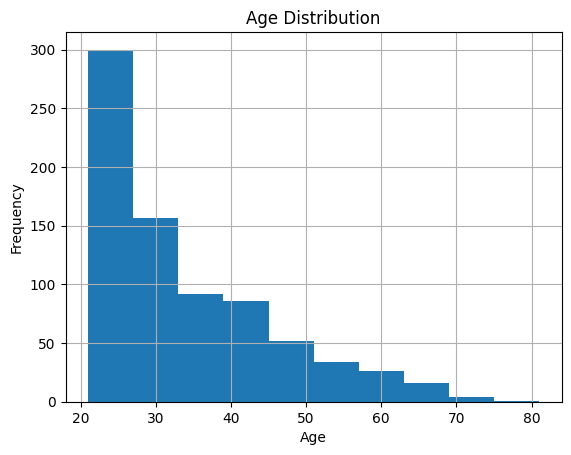

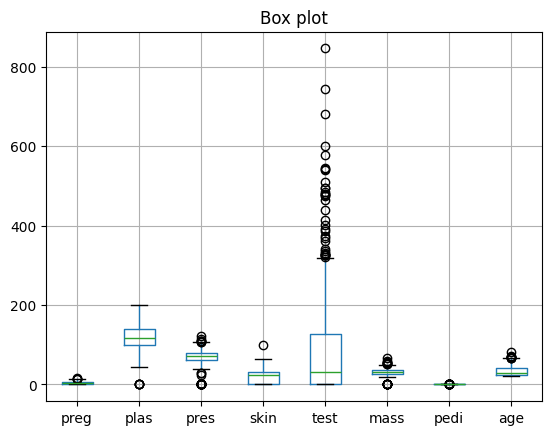

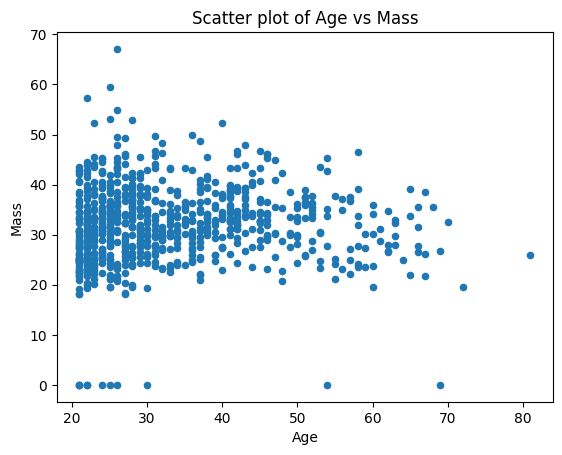

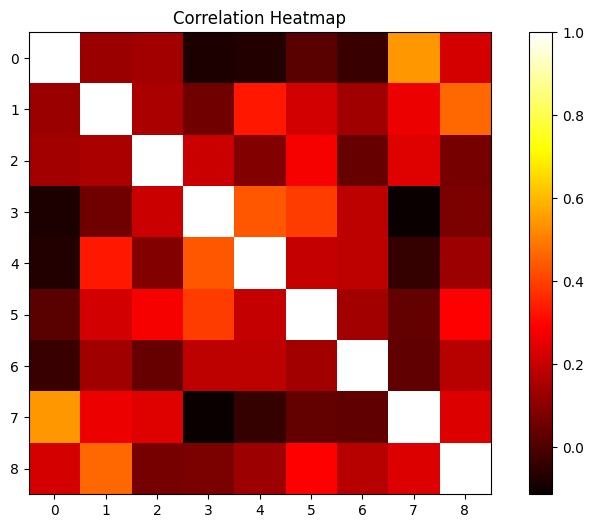

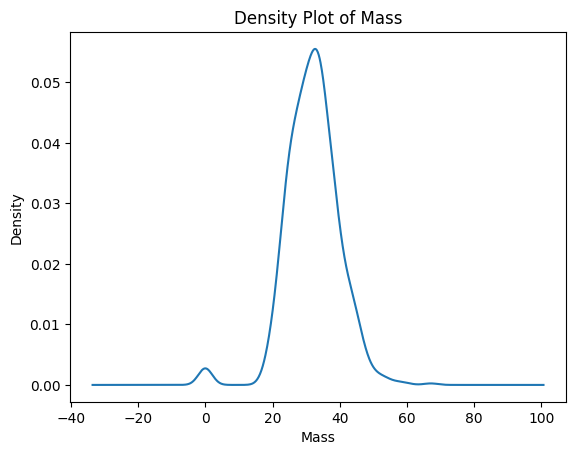

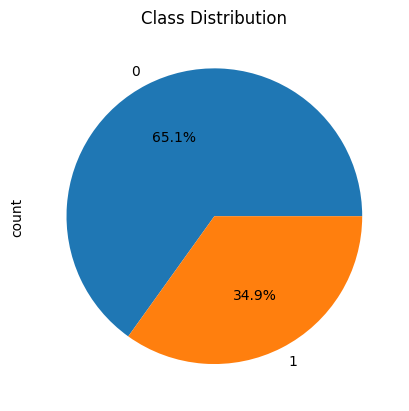

In [9]:
# %load ml06.py
import matplotlib.pyplot as plt
import pandas as pd
# Load the dataset
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('data/pima-indians-diabetes.data.csv', names=header)
# Histogram
df['age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plotting boxplots for the features
df.boxplot(column=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'])
plt.title('Box plot')
plt.show()

# Scatter Plot
df.plot.scatter(x='age', y='mass')
plt.title('Scatter plot of Age vs Mass')
plt.xlabel('Age')
plt.ylabel('Mass')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
plt.imshow(df.corr(), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.show()

# Density Plot
df['mass'].plot(kind='density')
plt.title('Density Plot of Mass')
plt.xlabel('Mass')
plt.show()

# Pie Chart
df['class'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title('Class Distribution')
plt.show()


In [10]:
# %load ml07.py
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('data/data_cleaning.csv')
print(df)

# Remove duplicated rows
df = df.drop_duplicates()
# Remove duplicated columns
df = df.T.drop_duplicates().T
print(df)

# Mark missing values as NaN
df = df.apply(pd.to_numeric, errors='coerce')
print(df)
print(df.info())

# Remove columns with no variance
variance = df.var()
columns_to_drop = variance[variance == 0].index
df = df.drop(columns=columns_to_drop)
print(df)

# Calculate the number of outliers for each feature
outliers = {}
for column in df.columns[:-1]:  # Excluding the last column (target)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
# Print the number of outliers for each feature
for column in outliers:
    print(f"Feature ‘{column}' has {outliers[column]} outliers")

# Clip outliers
for column in df.columns[:-1]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
print(df)


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6 Feature_7  \
0        5.1        3.5        1.4        0.2          1        2.5       5.1   
1        4.9        3.0        1.4        0.2          1        2.4       4.9   
2        4.7        3.2        1.3        0.2          1        2.6       4.7   
3        4.6        3.1        1.5        0.2          1        2.5       4.6   
4          5        3.6        1.4        0.2          1        2.5         5   
5          x        3.9        1.7        0.4          1        3.0         x   
6        5.4        3.4        1.7        0.3          1        2.8       5.4   
7          5        3.5        1.4        0.2          1        2.5         5   
8        5.2        3.4        NaN        0.2          1        2.7       5.2   
9        5.3        3.5        1.4        0.2          1        2.5       5.3   
10       5.4        3.9        1.7        0.4          1       -5.0       5.4   
11       4.9        3.0     

In [11]:
# %load ml08.py
import pandas as pd
import numpy as np
df = pd.DataFrame({'Age': [17, 23, 0, 38, 54, 67, 32],
                   'Height': [160, 172, 150, 165, 163, 158, 175],
                   'Weight':[50, 68, 43, 52, 47, 49, 0]})
df = df.replace({0: np.nan}) # replace missing value (0) with NaN
print(df)
print(df.isnull().sum())
df = df.dropna(axis=0) # drop rows with NaN
print(df)


    Age  Height  Weight
0  17.0     160    50.0
1  23.0     172    68.0
2   NaN     150    43.0
3  38.0     165    52.0
4  54.0     163    47.0
5  67.0     158    49.0
6  32.0     175     NaN
Age       1
Height    0
Weight    1
dtype: int64
    Age  Height  Weight
0  17.0     160    50.0
1  23.0     172    68.0
3  38.0     165    52.0
4  54.0     163    47.0
5  67.0     158    49.0


In [12]:
# %load ml09.py
import pandas as pd
import numpy as np
df = pd.DataFrame({'Age': [17, 23, 0, 38, 54, 67, 32],
                   'Height': [160, 172, 150, 165, 163, 158, 175],
                   'Weight':[50, 68, 43, 52, 47, 49, 0]})
df = df.replace({0: np.nan})
df['Age'] = df['Age'].fillna(df['Age'].median()) # replace NaN with median
df['Weight'] = df['Weight'].fillna(df['Weight'].mean()) # replace NaN with mean
print(df)


    Age  Height  Weight
0  17.0     160    50.0
1  23.0     172    68.0
2  35.0     150    43.0
3  38.0     165    52.0
4  54.0     163    47.0
5  67.0     158    49.0
6  32.0     175    51.5


In [13]:
# %load ml10.py
# Handling categorical data
import pandas as pd
df = pd.DataFrame({'year':[2015, 2017, 2013, 2018, 2020],
                   'maker':['Toyota', 'Honda', 'Perodua', 'Hyundai', 'Toyota'],
                   'engine':[1.5, 1.8, 1.3, 1.6, 1.8],
                   'review':['moderate', 'good', 'poor', 'moderate', 'good']})
mapping = {'poor':1, 'moderate':2, 'good':3}
df['review'] = df['review'].map(mapping) # encode ordinal data
df = pd.get_dummies(df, columns=['maker']) # encode nominal data
print(df)


   year  engine  review  maker_Honda  maker_Hyundai  maker_Perodua  \
0  2015     1.5       2        False          False          False   
1  2017     1.8       3         True          False          False   
2  2013     1.3       1        False          False           True   
3  2018     1.6       2        False           True          False   
4  2020     1.8       3        False          False          False   

   maker_Toyota  
0          True  
1         False  
2         False  
3         False  
4          True  


In [14]:
# %load ml11.py
# Scale data (between 0 and 1)
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
# Separate into features and target
X = df.drop(columns=['class'])
y = df['class']
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
scaledX = scaler.transform(X)
# Check min and max of all column
print(f'minimum={np.min(scaledX, axis=0)}, maximum={np.max(scaledX, axis=0)}')

minimum=[0. 0. 0. 0. 0. 0. 0. 0.], maximum=[1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
# %load ml12.py
# Standardize data (0 mean, 1 stdev)
import numpy as np
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
# Separate into features and target
X = df.drop(columns=['class'])
y = df['class']
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
# Check mean and standard deviation of all columns
print(f'mean={np.mean(scaledX, axis=0)}, variance={np.var(scaledX, axis=0)}')


mean=[-6.47630098e-17 -9.25185854e-18  1.50342701e-17  1.00613962e-16
 -3.00685403e-17  2.59052039e-16  2.45174251e-16  1.93132547e-16], variance=[1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
# %load ml13.py
# Robust scaling (0 median, 1 IQR)
import numpy as np
from sklearn.preprocessing import RobustScaler
from pandas import read_csv
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
# Separate into features and target
X = df.drop(columns=['class'])
y = df['class']
scaler = RobustScaler()
scaledX = scaler.fit_transform(X)
# Check median and IQR of all columns
q3, q1 = np.percentile(scaledX, [75 ,25], axis=0)
print(f'median={np.median(scaledX, axis=0)}, IQR={q3-q1}')

median=[0. 0. 0. 0. 0. 0. 0. 0.], IQR=[1. 1. 1. 1. 1. 1. 1. 1.]
